In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV,KFold

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    make_scorer,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score,
    auc,
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    silhouette_score,
    classification_report,
    confusion_matrix, 
    roc_curve, 
    auc, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score
)


# liens ver kaggles : https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data/data

In [3]:
df = pd.read_csv('personality_dataset.csv')

In [4]:
df.describe(include='all')

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,2837.000000,2827,2838.000000,2834.000000,2848,2823.000000,2835.000000,2900
unique,NaN,2,NaN,NaN,2,NaN,NaN,2
top,NaN,No,NaN,NaN,No,NaN,NaN,Extrovert
freq,NaN,1417,NaN,NaN,1441,NaN,NaN,1491
mean,4.505816,NaN,3.963354,3.000000,NaN,6.268863,3.564727,NaN
std,3.479192,NaN,2.903827,2.247327,NaN,4.289693,2.926582,NaN
min,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN
25%,2.000000,NaN,2.000000,1.000000,NaN,3.000000,1.000000,NaN
50%,4.000000,NaN,3.000000,3.000000,NaN,5.000000,3.000000,NaN
75%,8.000000,NaN,6.000000,5.000000,NaN,10.000000,6.000000,NaN


In [5]:
df.isnull().sum()


Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [6]:
df_mask = df.isnull().any(axis=1)
df_null = df[df_mask]
df_null

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
6,4.0,No,9.0,NaN,No,7.0,7.0,Extrovert
33,8.0,Yes,3.0,3.0,NaN,2.0,0.0,Introvert
41,1.0,No,4.0,5.0,No,NaN,10.0,Extrovert
59,NaN,No,9.0,4.0,No,7.0,5.0,Extrovert
71,1.0,No,NaN,5.0,No,11.0,8.0,Extrovert
...,...,...,...,...,...,...,...,...
2882,1.0,NaN,9.0,3.0,No,7.0,6.0,Extrovert
2885,10.0,Yes,0.0,0.0,NaN,2.0,0.0,Introvert
2893,9.0,NaN,2.0,0.0,Yes,4.0,2.0,Introvert
2894,0.0,No,9.0,3.0,No,12.0,NaN,Extrovert


In [7]:
cols_numeriques = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
                   'Friends_circle_size', 'Post_frequency']

for col in cols_numeriques:
    df[col].fillna(df[col].mean(), inplace=True)


C:\Users\best baguette\AppData\Local\Temp\ipykernel_3980\3012802199.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [8]:
df_cleaned = df.dropna(subset=['Stage_fear', 'Drained_after_socializing'])


In [9]:
df_cleaned.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

Pour les valeurs numériques, nous remplaçons les NaN par la moyenne de chaque colonne, car nous avons vérifié qu’il n’y a pas d’outliers, ce qui rend cette méthode fiable.
Pour les colonnes catégorielles, nous supprimons simplement les lignes contenant des NaN afin de ne pas risquer d’altérer un éventuel pattern lié aux individus. Cette suppression représente une perte de 2,8 % du dataset.

In [10]:
df_cleaned.duplicated().sum()

np.int64(391)

On garde les doublons, car plusieurs individus peuvent avoir les mêmes caractéristiques.

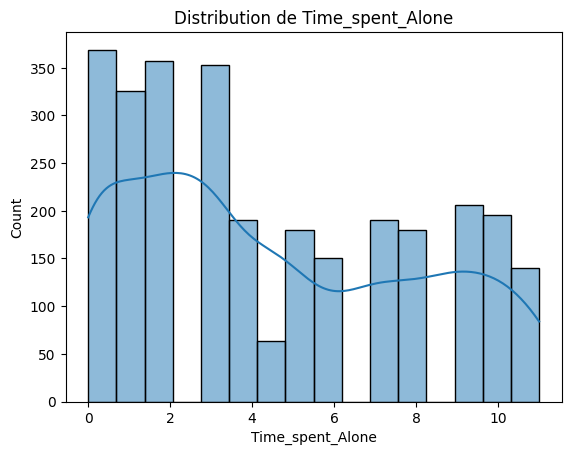

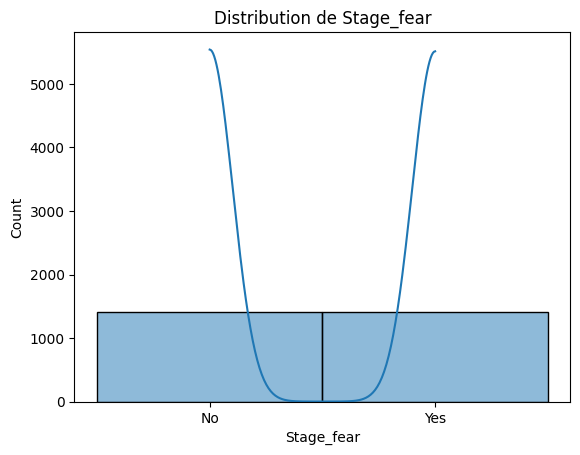

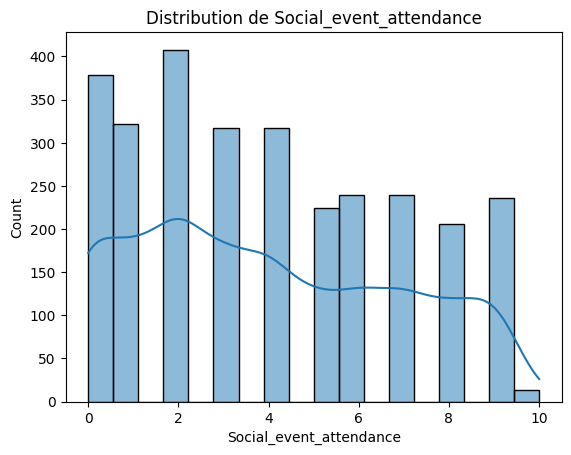

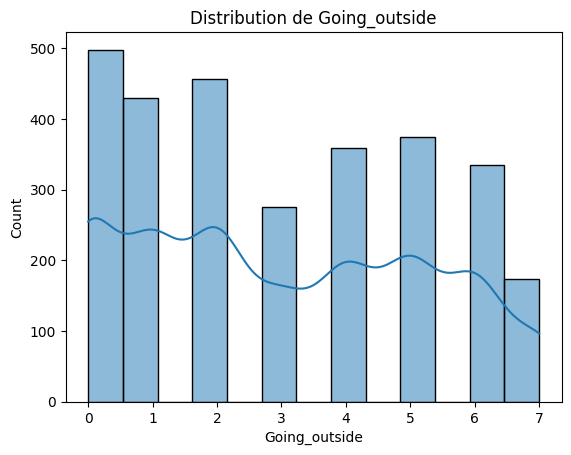

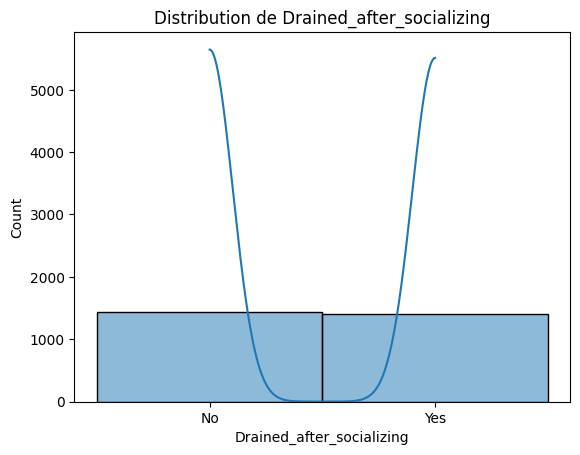

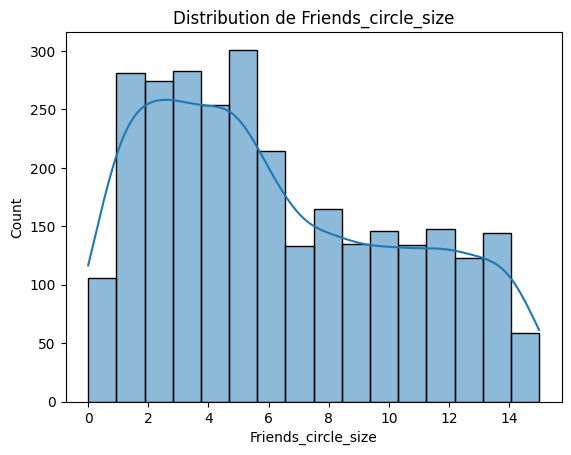

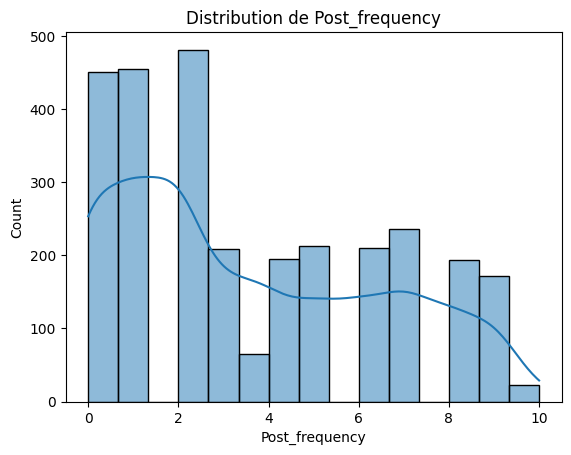

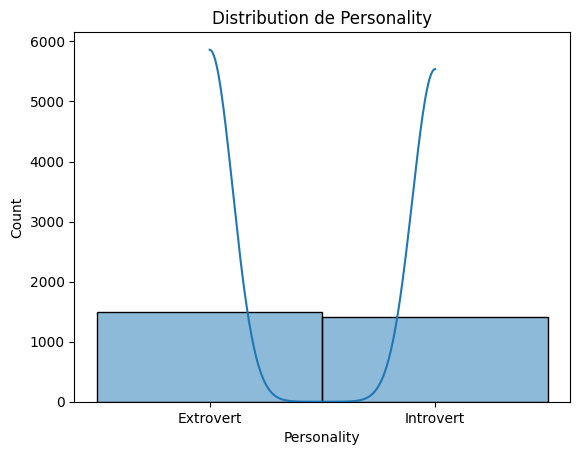

In [11]:

for col in df_cleaned.columns:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution de {col}')
    plt.show()

**Analyse des distributions par colonnes :**

Temps passé seul :
On observe que la majorité des personnes passent entre 0 et 3 heures seules par jour. Au-delà de 3 heures, le nombre de personnes diminue d’environ une moitié.

Stage fear :
Variable catégorielle avec une répartition équilibrée entre les modalités (Yes/No), ce qui correspond à une distribution presque parfaite.

Participation à des événements sociaux :
On remarque une tendance descendante : la majorité des personnes participent à entre 1 et 4 événements sociaux, puis ce nombre décroît progressivement jusqu’à 9, avant de chuter drastiquement à 10.

Sorties dehors :
La distribution présente une tendance générale à la baisse avec une baisse notable à 3 sorties (environ divisée par deux). Ensuite, on observe une légère remontée entre 4 et 6 sorties, suivie d’une nouvelle baisse à 7.
On note également qu’un nombre significatif de personnes ne sortent pas du tout, tandis qu’un autre groupe sort une à deux fois par jour.

Feeling drained after socializing :
La distribution est presque équilibrée, avec une répartition quasi parfaite entre les réponses.

Taille du cercle d’amis :
La distribution ressemble à une courbe normale avec un pic entre 2 et 4 amis, indiquant que la majorité des individus ont un cercle d’amis restreint.

Publication sur les réseaux sociaux :
On observe que globalement, les personnes postent peu, la majorité publiant entre 0 et 2 fois.

Personnalité :
La distribution des catégories Extrovert/Introvert est presque équilibrée, indiquant une répartition homogène dans le dataset.



In [12]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2776 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2776 non-null   float64
 1   Stage_fear                 2776 non-null   object 
 2   Social_event_attendance    2776 non-null   float64
 3   Going_outside              2776 non-null   float64
 4   Drained_after_socializing  2776 non-null   object 
 5   Friends_circle_size        2776 non-null   float64
 6   Post_frequency             2776 non-null   float64
 7   Personality                2776 non-null   object 
dtypes: float64(5), object(3)
memory usage: 195.2+ KB


In [13]:
df_cleaned[df_cleaned.select_dtypes(include='object').columns] = df_cleaned.select_dtypes(include='object').apply(lambda x: x.astype('category'))


C:\Users\best baguette\AppData\Local\Temp\ipykernel_3980\3434428286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[df_cleaned.select_dtypes(include='object').columns] = df_cleaned.select_dtypes(include='object').apply(lambda x: x.astype('category'))


In [14]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2776 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Time_spent_Alone           2776 non-null   float64 
 1   Stage_fear                 2776 non-null   category
 2   Social_event_attendance    2776 non-null   float64 
 3   Going_outside              2776 non-null   float64 
 4   Drained_after_socializing  2776 non-null   category
 5   Friends_circle_size        2776 non-null   float64 
 6   Post_frequency             2776 non-null   float64 
 7   Personality                2776 non-null   category
dtypes: category(3), float64(5)
memory usage: 138.6 KB


On modifie les types object en category afin de gagner de la mémoire et de faciliter les opérations pendant l’entraînement des modèles.

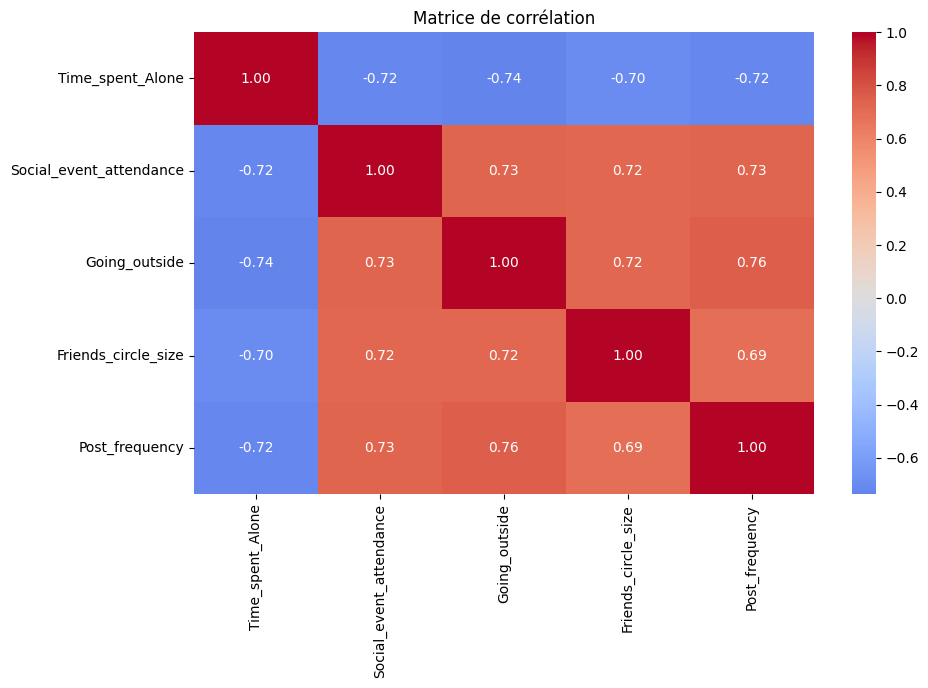

In [15]:
corr_matrice = df_cleaned.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrice, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matrice de corrélation")
plt.show()

Sur cette matrice de corrélation, on distingue clairement deux groupes :

Le premier groupe regroupe les personnes qui passent le plus de temps seules. Celles-ci ont tendance à poster moins sur les réseaux sociaux, à avoir un cercle d’amis plus restreint, à sortir moins souvent et à participer à moins d’événements sociaux.
La corrélation la plus forte dans ce groupe est négative (-0,74) et concerne la fréquence de sortie : plus ces individus passent de temps seuls, moins ils sortent.

Le deuxième groupe correspond à ceux qui sortent plus fréquemment. Ils ont tendance à poster davantage sur les réseaux sociaux, à participer à plus d’événements sociaux et à avoir un cercle d’amis plus large.
La corrélation la plus forte dans ce groupe est positive (0,76) et concerne la fréquence de publication sur les réseaux sociaux : sortir plus est associé à poster plus.

In [16]:
df_encoded = pd.get_dummies(df_cleaned, columns=['Stage_fear','Drained_after_socializing','Personality'], drop_first=True)

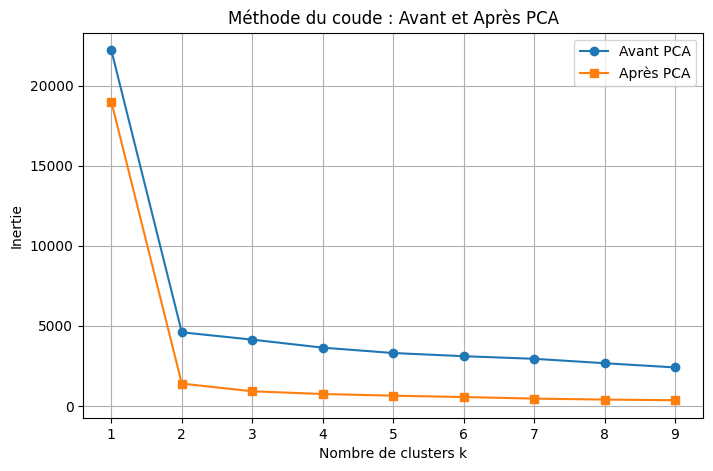

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

inertia_before = []
inertia_after = []

K_range = range(1, 10)

for k in K_range:
    kmeans_before = KMeans(n_clusters=k, random_state=42)
    kmeans_before.fit(X_scaled)
    inertia_before.append(kmeans_before.inertia_)
    
    kmeans_after = KMeans(n_clusters=k, random_state=42)
    kmeans_after.fit(X_pca)
    inertia_after.append(kmeans_after.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia_before, marker='o', label='Avant PCA')
plt.plot(K_range, inertia_after, marker='s', label='Après PCA')
plt.xlabel('Nombre de clusters k')
plt.ylabel('Inertie')
plt.title('Méthode du coude : Avant et Après PCA')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
print(df_encoded.head())

   Time_spent_Alone  Social_event_attendance  Going_outside  \
0               4.0                      4.0            6.0   
1               9.0                      0.0            0.0   
2               9.0                      1.0            2.0   
3               0.0                      6.0            7.0   
4               3.0                      9.0            4.0   

   Friends_circle_size  Post_frequency  Stage_fear_Yes  \
0                 13.0             5.0           False   
1                  0.0             3.0            True   
2                  5.0             2.0            True   
3                 14.0             8.0           False   
4                  8.0             5.0           False   

   Drained_after_socializing_Yes  Personality_Introvert  
0                          False                  False  
1                           True                   True  
2                           True                   True  
3                          False        

In [29]:
best_score = -1
best_k = None

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    print(f"Score silhouette pour k={k} : {score:.3f}")
    
    if score > best_score:
        best_score = score
        best_k = k

print(f"\nMeilleur score silhouette : {best_score:.3f} pour k = {best_k}")


Score silhouette pour k=2 : 0.828
Score silhouette pour k=3 : 0.643
Score silhouette pour k=4 : 0.394
Score silhouette pour k=5 : 0.415

Meilleur score silhouette : 0.828 pour k = 2


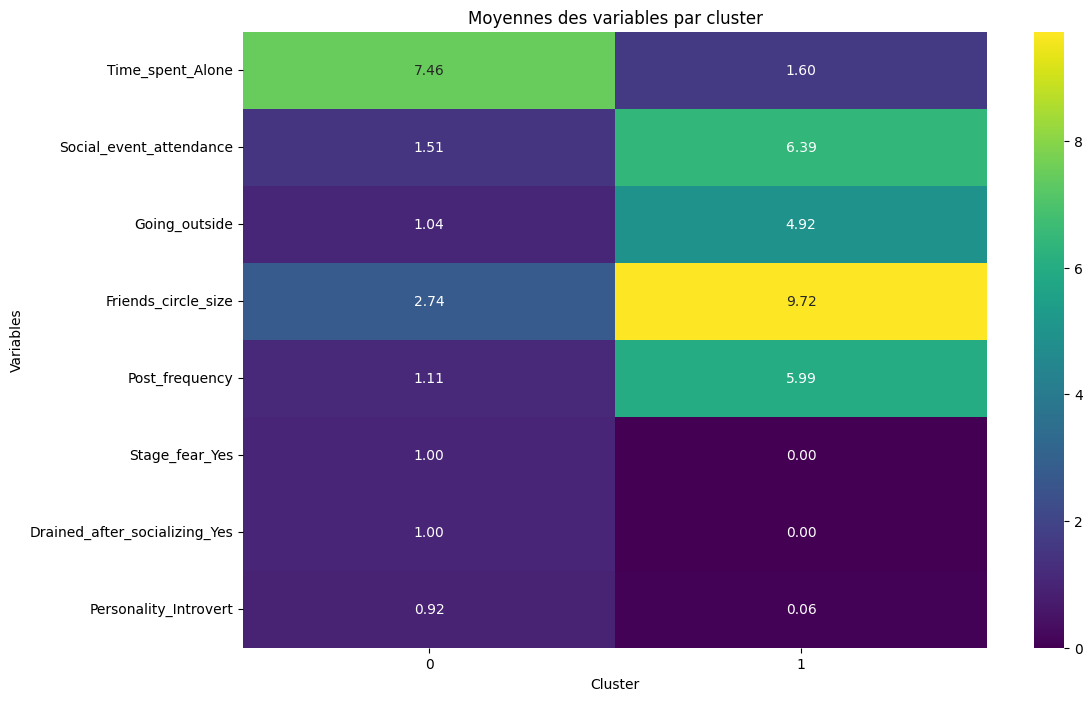

In [30]:
k_optimal = best_k
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42)
kmeans_final.fit(X_scaled)
labels = kmeans_final.labels_
df_with_clusters = df_encoded.copy()
df_with_clusters['Cluster'] = labels
cluster_means = df_with_clusters.groupby('Cluster').mean()

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means.T, annot=True, cmap='viridis', fmt='.2f')
plt.title('Moyennes des variables par cluster')
plt.xlabel('Cluster')
plt.ylabel('Variables')
plt.show()

**Analyse des clusters**
On observe deux clusters distincts :

Cluster 1 : Ce groupe regroupe principalement des individus introvertis. Ils passent en moyenne 7,46 heures seuls par jour, disposent d’un petit cercle d’amis, et déclarent se sentir fatigués après des interactions sociales.

Cluster 2 : Ce cluster est composé majoritairement d’extravertis. Ils passent moins de temps seuls, ont un grand cercle social (9.72), postent fréquemment sur les réseaux sociaux et participent régulièrement à des événements sociaux.

In [33]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2776 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Time_spent_Alone               2776 non-null   float64
 1   Social_event_attendance        2776 non-null   float64
 2   Going_outside                  2776 non-null   float64
 3   Friends_circle_size            2776 non-null   float64
 4   Post_frequency                 2776 non-null   float64
 5   Stage_fear_Yes                 2776 non-null   bool   
 6   Drained_after_socializing_Yes  2776 non-null   bool   
 7   Personality_Introvert          2776 non-null   bool   
dtypes: bool(3), float64(5)
memory usage: 138.3 KB


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Meilleurs paramètres KNN : {'knn__metric': 'manhattan', 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}
Meilleur score F1 (GridSearchCV) : 0.9287
Seuil optimal (tpr - fpr max) : 0.556
Accuracy : 0.9305
Precision : 0.9186
Recall : 0.9398
F1-score : 0.9291


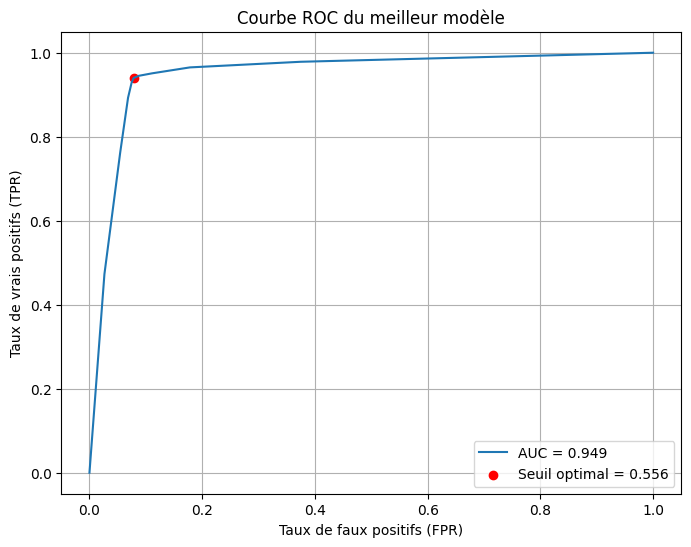

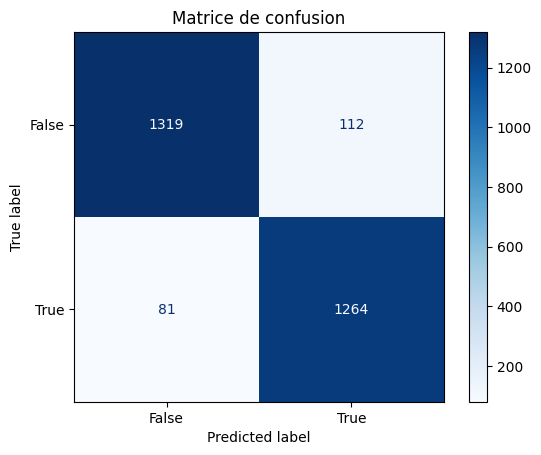

In [43]:
X = df_encoded.drop(columns=['Personality_Introvert'])
y = df_encoded['Personality_Introvert']

skf = KFold(n_splits=5, shuffle=True, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

scoring = {
    'accuracy': 'accuracy',
    'neg_log_loss': 'neg_log_loss',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary')
}

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=skf,
    scoring=scoring,
    refit = 'f1',
    n_jobs=-1,
    verbose=1
)

grid.fit(X, y)
print("Meilleurs paramètres KNN :", grid.best_params_)
print("Meilleur score F1 (GridSearchCV) :", round(grid.best_score_, 4))

best_knn = grid.best_estimator_

y_true_all = []
y_prob_all = []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    best_knn.fit(X_train, y_train)
    y_prob = best_knn.predict_proba(X_test)[:, 1]

    y_true_all.extend(y_test)
    y_prob_all.extend(y_prob)

y_true_all = np.array(y_true_all)
y_prob_all = np.array(y_prob_all)

fpr, tpr, thresholds = roc_curve(y_true_all, y_prob_all)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print("Seuil optimal (tpr - fpr max) :", round(optimal_threshold, 3))


y_pred_final = (y_prob_all >= optimal_threshold).astype(int)

accuracy = accuracy_score(y_true_all, y_pred_final)
precision = precision_score(y_true_all, y_pred_final)
recall = recall_score(y_true_all, y_pred_final)
f1 = f1_score(y_true_all, y_pred_final)

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall : {recall:.4f}")
print(f"F1-score : {f1:.4f}")

cm = confusion_matrix(y_true_all, y_pred_final)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Seuil optimal = {optimal_threshold:.3f}')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC du meilleur modèle')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()

Le modèle KNN atteint un score de 92 %, avec un rappel (recall) équilibré à 93 % et une précision (precision) de 91 %, ce qui témoigne de sa fiabilité.
On note :

TN = 1319 (introvertis correctement identifiés),

FP = 112 (introvertis mal classés),

FN = 81 (extravertis non détectés),

TP = 1234 (extravertis correctement identifiés).

la courbe roc est quasi parfaite indiquant que le seuil optimal a été trouvé

Fitting 5 folds for each of 24 candidates, totalling 120 fits
=== Meilleur Modèle Random Forest ===
F1 Score moyen (cross-val) : 0.9298
Meilleurs hyperparamètres : {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Seuil optimal basé sur la courbe ROC : 0.5146
TPR : 0.9413 | FPR : 0.0776
              precision    recall  f1-score   support

       False     0.9435    0.9224    0.9329      1431
        True     0.9194    0.9413    0.9302      1345

    accuracy                         0.9316      2776
   macro avg     0.9315    0.9318    0.9315      2776
weighted avg     0.9318    0.9316    0.9316      2776



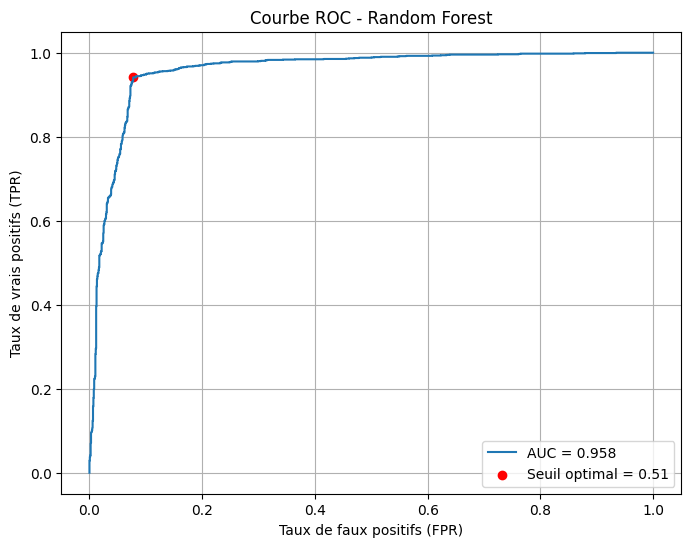

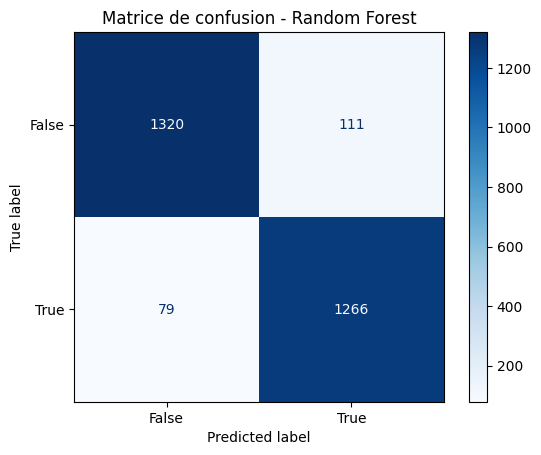

In [54]:

model = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# scoring = {
#     'accuracy': 'accuracy',
#     'neg_log_loss': 'neg_log_loss',
#     'precision': make_scorer(precision_score, average='binary'),
#     'recall': make_scorer(recall_score, average='binary'),
#     'f1': make_scorer(f1_score, average='binary')
# }

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=skf,
    scoring=scoring,
    refit = 'f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X, y)
print("=== Meilleur Modèle Random Forest ===")
print(f"F1 Score moyen (cross-val) : {grid_search.best_score_:.4f}")
print(f"Meilleurs hyperparamètres : {grid_search.best_params_}")

print("=====================================")

best_model_rdf = grid_search.best_estimator_

y_true_all, y_prob_all, y_pred_all = [], [], []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    best_model_rdf.fit(X_train, y_train)
    y_prob = best_model_rdf.predict_proba(X_test)[:, 1]
    y_pred = best_model_rdf.predict(X_test)

    y_true_all.extend(y_test)
    y_prob_all.extend(y_prob)
    y_pred_all.extend(y_pred)

y_true_all = np.array(y_true_all)
y_prob_all = np.array(y_prob_all)
y_pred_all = np.array(y_pred_all)


fpr, tpr, thresholds = roc_curve(y_true_all, y_prob_all)
auc = roc_auc_score(y_true_all, y_prob_all)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_fpr = fpr[optimal_idx]
optimal_tpr = tpr[optimal_idx]

print(f"Seuil optimal basé sur la courbe ROC : {optimal_threshold:.4f}")
print(f"TPR : {optimal_tpr:.4f} | FPR : {optimal_fpr:.4f}")
print(classification_report(y_true_all, y_pred_all, digits=4))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.scatter(optimal_fpr, optimal_tpr, color='red', label=f'Seuil optimal = {optimal_threshold:.2f}')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

cm = confusion_matrix(y_true_all, y_pred_all)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model_rdf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion - Random Forest")
plt.show()

Le modèle présente un bon équilibre entre les classes False et True, avec des scores F1 proches de 0,93 pour chacune.

La précision et le rappel sont élevés pour les deux classes, ce qui traduit un faible nombre de faux positifs et de faux négatifs.

De plus, ce modèle dépasse légèrement les performances du KNN.

Enfin, la courbe ROC est quasi parfaite, témoignant d’une excellente capacité de discrimination.

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


d:\projects_python\ML-Extrovert-vs-introvert-Behavior\.venv_behavior\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:00:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\projects_python\ML-Extrovert-vs-introvert-Behavior\.venv_behavior\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:00:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\projects_python\ML-Extrovert-vs-introvert-Behavior\.venv_behavior\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:00:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\projects_python\ML-Extrovert-vs-introvert-Behavior\.venv_behavior\Lib\site-packages\xgboost\tr

=== Meilleur Modèle xgboost ===
F1 Score moyen (cross-val) : 0.9298
Meilleurs hyperparamètres : {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Seuil optimal basé sur la courbe ROC : 0.6525
TPR : 0.9413 | FPR : 0.0776
              precision    recall  f1-score   support

       False     0.9435    0.9224    0.9329      1431
        True     0.9194    0.9413    0.9302      1345

    accuracy                         0.9316      2776
   macro avg     0.9315    0.9318    0.9315      2776
weighted avg     0.9318    0.9316    0.9316      2776

=== Évaluation finale du modèle ===
Accuracy : 0.9316
Precision : 0.9194
Recall : 0.9413
F1-score : 0.9302


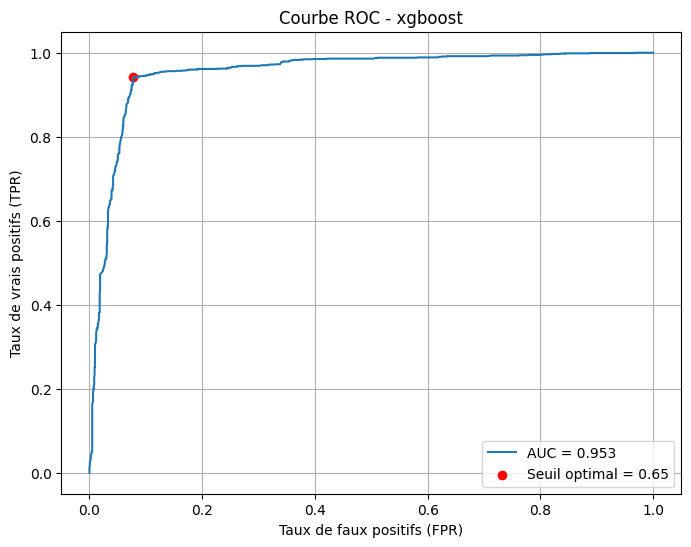

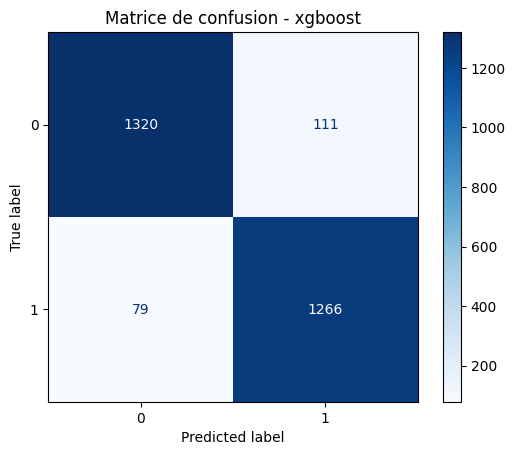

In [52]:

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'gamma': [0, 0.1, 0.2]
}


scoring_xg = {
    'accuracy': 'accuracy',
    'neg_log_loss': 'neg_log_loss',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary')
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=skf,
    scoring=scoring_xg,
    refit = 'f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X, y)
print("=== Meilleur Modèle xgboost ===")
print(f"F1 Score moyen (cross-val) : {grid_search.best_score_:.4f}")
print(f"Meilleurs hyperparamètres : {grid_search.best_params_}")

print("=====================================")

best_model = grid_search.best_estimator_

y_true_all, y_prob_all, y_pred_all = [], [], []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    best_model.fit(X_train, y_train)
    y_prob = best_model.predict_proba(X_test)[:, 1]
    y_pred = best_model.predict(X_test)

    y_true_all.extend(y_test)
    y_prob_all.extend(y_prob)
    y_pred_all.extend(y_pred)

y_true_all = np.array(y_true_all)
y_prob_all = np.array(y_prob_all)
y_pred_all = np.array(y_pred_all)


fpr, tpr, thresholds = roc_curve(y_true_all, y_prob_all)
auc = roc_auc_score(y_true_all, y_prob_all)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_fpr = fpr[optimal_idx]
optimal_tpr = tpr[optimal_idx]

print(f"Seuil optimal basé sur la courbe ROC : {optimal_threshold:.4f}")
print(f"TPR : {optimal_tpr:.4f} | FPR : {optimal_fpr:.4f}")
print(classification_report(y_true_all, y_pred_all, digits=4))
print("=== Évaluation finale du modèle ===")
print(f"Accuracy : {accuracy_score(y_true_all, y_pred_all):.4f}")
print(f"Precision : {precision_score(y_true_all, y_pred_all):.4f}")
print(f"Recall : {recall_score(y_true_all, y_pred_all):.4f}")
print(f"F1-score : {f1_score(y_true_all, y_pred_all):.4f}")


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.scatter(optimal_fpr, optimal_tpr, color='red', label=f'Seuil optimal = {optimal_threshold:.2f}')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - xgboost')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

cm = confusion_matrix(y_true_all, y_pred_all)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion - xgboost")
plt.show()

XGBoost : obtient des résultats similaires à ceux des modèles précédents.

Conclusion :
Il est préférable d’utiliser KNN ou Random Forest, qui consomment moins de ressources tout en offrant des performances comparables à XGBoost, surtout dans le cas d’un dataset bien équilibré et de petite taille.

In [55]:
import joblib

# Enregistrer le modèle
joblib.dump(best_model_rdf, 'random_forest_model.pkl')

print("Modèle enregistré sous random_forest_model.pkl")


Modèle enregistré sous random_forest_model.pkl


# True = introverti

# False = extraverti